<a href="https://colab.research.google.com/github/himanshunagapure/Evaluating-Good-ROI-in-Stock-Market/blob/main/Change_in_Price_Comparison_with_Peers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') 

In [ ]:
#Uploading dataset downloaded from kaggle
#from google.colab import files
#uploaded = files.upload()

In [ ]:
df_tatamotors = pd.read_csv("pdata/TATAMOTORS.csv")
df_bajaj = pd.read_csv("pdata/BAJAJ-AUTO.csv")
df_mm = pd.read_csv("pdata/MM.csv")
df_maruti = pd.read_csv("pdata/MARUTI.csv")
df_mm.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,M&M,EQ,419.75,453.30,453.35,448.90,453.35,453.35,453.18,67195,3.045174e+12,NaN,NaN,NaN
1,2000-01-04,M&M,EQ,453.35,489.60,489.65,489.60,489.65,489.65,489.65,37470,1.834710e+12,NaN,NaN,NaN
2,2000-01-05,M&M,EQ,489.65,528.85,528.85,451.15,519.00,514.85,521.37,227621,1.186745e+13,NaN,NaN,NaN
3,2000-01-06,M&M,EQ,514.85,528.00,550.00,518.00,521.00,524.55,538.27,198870,1.070456e+13,NaN,NaN,NaN
4,2000-01-07,M&M,EQ,524.55,515.00,522.00,490.00,498.90,496.40,508.09,91052,4.626258e+12,NaN,NaN,NaN


In [ ]:
#We need only 2 columns for this project.
df_tatamotors = df_tatamotors[['Date','Close']].set_index('Date').rename(columns={'Close':'TataMotors Close'})
df_bajaj = df_bajaj[['Date','Close']].set_index('Date').rename(columns={'Close':'BajajAuto Close'})
df_mm = df_mm[['Date','Close']].set_index('Date').rename(columns={'Close':'M&M Close'})
df_maruti = df_maruti[['Date','Close']].set_index('Date').rename(columns={'Close':'Maruti Close'})
df_maruti.head()

,Maruti Close
Date,
2003-07-09,164.30
2003-07-10,167.00
2003-07-11,173.35
2003-07-14,177.95
2003-07-15,176.20


In [ ]:
#Combining all 4 dfs into single df
df = pd.DataFrame([df_tatamotors['TataMotors Close'],df_bajaj['BajajAuto Close'],df_mm['M&M Close'],df_maruti['Maruti Close']]).transpose()
df.tail()

,TataMotors Close,BajajAuto Close,M&M Close,Maruti Close
2021-04-26,295.40,3738.85,780.50,6638.90
2021-04-27,301.50,3785.50,778.40,6568.75
2021-04-28,305.90,3889.75,782.10,6573.80
2021-04-29,301.90,3836.45,774.60,6565.65
2021-04-30,293.85,3833.75,752.55,6455.65


In [ ]:
#https://practicaldatascience.co.uk/data-science/how-to-reformat-dates-in-pandas
df['Year'] = df.index
df['Year'] = pd.to_datetime(df['Year'], format='%Y-%m-%d')
df['mmyy'] = df['Year'].dt.strftime('%b-%Y')
df['Year'] = df['Year'].dt.year
df.tail()

,TataMotors Close,BajajAuto Close,M&M Close,Maruti Close,Year,mmyy
2021-04-26,295.40,3738.85,780.50,6638.90,2021,Apr-2021
2021-04-27,301.50,3785.50,778.40,6568.75,2021,Apr-2021
2021-04-28,305.90,3889.75,782.10,6573.80,2021,Apr-2021
2021-04-29,301.90,3836.45,774.60,6565.65,2021,Apr-2021
2021-04-30,293.85,3833.75,752.55,6455.65,2021,Apr-2021



```
# def combine_mmyy(row):
  row['mmyy'] = row['Month'] +'-'+ row['Year']
  return row
import calendar
df['Year'] = df.index
#Taking month and year in diff columns
#df['Month'] = pd.DatetimeIndex(df['Year']).month
#df['Year'] = pd.DatetimeIndex(df['Year']).year
#df.apply(combine_mmyy)
#df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

dfnew = df[df['Year'] == 2021]
dfnew.head()
```



```
# #Get current axis
ax = plt.gca()
plt.figure(figsize=(20,5))
# set the title
plt.xlabel('Year')
plt.ylabel('Last Close')
plt.title('Returns per Year')

# line plot for math marks
df.plot(kind = 'line',
		x = 'Year',
		y = 'TataMotors Close',
		color = 'green',ax = ax)

# line plot for physics marks
df.plot(kind = 'line',x = 'Year',
		y = 'M&M Close',
		color = 'blue',ax = ax)

# line plot for chemistry marks
df.plot(kind = 'line',x = 'Year',
		y = 'BajajAuto Close',
		color = 'black',ax = ax)

# line plot for chemistry marks
df.plot(kind = 'line',x = 'Year',
		y = 'Maruti Close',
		color = 'red',ax = ax)

# show the plot
plt.show()
```



In [ ]:
#Get data of last 5 years
df_last5 = df[df['Year'] >= 2015]

#Get data of last 2 years
df_lastyr = df[df['Year'] >= 2020]
df_lastyr.shape

(332, 6)

#%matplotlib notebook
df_lastyr.plot(x='mmyy', y=['TataMotors Close', 'BajajAuto Close', 'Maruti Close','M&M Close'],
        figsize =(10,3.5))
plt.legend(bbox_to_anchor=(0.8,1.2), ncol=4)
plt.title('Price Comparison')
plt.subplots_adjust(bottom=0.2)

plt.show()


In [ ]:
df_lastyr.shape

(332, 6)

In [ ]:
#Working with last 2 years data (2020,2021)
def CreatePnL(row):
    row['TataMotors'] = (row['TataMotors Close'] - tm_row0)/tm_row0
    row['BajajAuto'] = (row['BajajAuto Close'] - bajaj_row0)/bajaj_row0
    row['M&M'] = (row['M&M Close'] - mm_row0)/mm_row0
    row['Maruti'] = (row['Maruti Close'] - maruti_row0)/maruti_row0
    return row

tm_row0 = df_lastyr.iloc[0]['TataMotors Close']
bajaj_row0 = df_lastyr.iloc[0]['BajajAuto Close']
mm_row0 = df_lastyr.iloc[0]['M&M Close']
maruti_row0 = df_lastyr.iloc[0]['Maruti Close']

df_lastyr = df_lastyr.apply(CreatePnL,axis=1)
df_lastyr.shape

(332, 14)

<IPython.core.display.Javascript object>


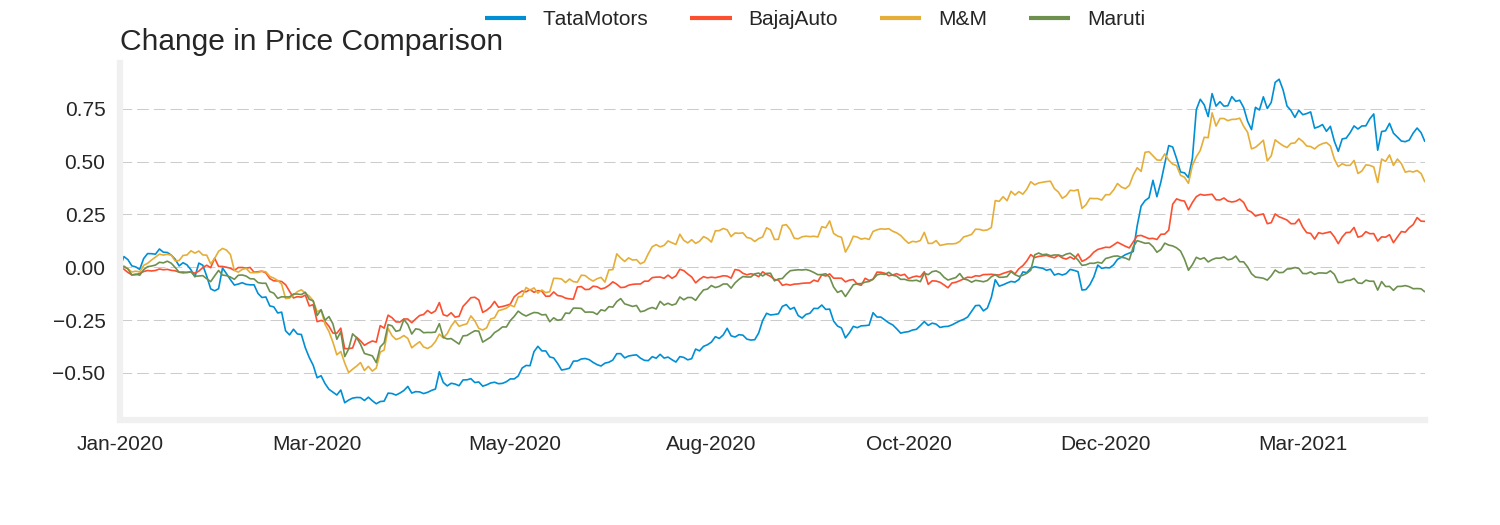

In [ ]:
%matplotlib notebook
ax = df_lastyr.plot(x='mmyy', y=['TataMotors', 'BajajAuto', 'M&M','Maruti'],figsize =(10,3.5),linewidth=0.8)

leg = plt.legend(bbox_to_anchor=(0.8,1.2), ncol=4)
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(2)
    
plt.title('Change in Price Comparison',loc='left')

#change plot background color (reducing ink ratio 1)
ax.set_facecolor(color='white')

#Hide xlabel (reducing ink ratio 2)
plt.xlabel("Date", color='white')

#Adjusting grid lines (reducing ink ratio 3)
ax.grid(None)
ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.2)

# Hide the right and top spines of frame (reducing ink ratio 4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#get some space from bottom
plt.subplots_adjust(bottom=0.2)

#Add interactivity
def onhover(event):
    ax.text(event.xdata, event.ydata, 'Change={:.2f}%'.format(event.ydata * 100), ha="center", va="center", size=9,
            bbox=dict(boxstyle="round,pad=0.3", fc="#DCDCDC", ec="b", lw=1))
    plt.gcf().canvas.draw_idle()
#   ax.annotate('Profit={:.2f}%'.format(event.ydata * 100), xy=(event.xdata, event.ydata),  xycoords='data',
#       xytext=(0.8, 0.95), textcoords='axes fraction',arrowprops=dict(facecolor='black', shrink=0.05,width=1.5,headwidth=1.5),
#       horizontalalignment='right', verticalalignment='top')


plt.gcf().canvas.mpl_connect('button_press_event',onhover)

plt.show()